In [1]:
import biosonic
print(biosonic.__file__)

/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/__init__.py


In [2]:
import numpy as np
from scipy.signal import chirp
from biosonic.plot import plot_filterbank_and_cepstrum, plot_spectrogram, plot_cepstrum
from biosonic.filter import mel_filterbank, log_filterbank
from biosonic.compute.spectrotemporal import cepstral_coefficients, spectrogram, cepstrum
from biosonic.handle import read_wav

In [3]:
n_filters = 20
n_fft = 1024
n_ceps = 32

f1 = 300
f2 = 5000
duration = 1
sr = 16000
time = np.linspace(0, duration, int(sr * duration), endpoint=False)
x = chirp(time, f1, 1, f2, method='hyperbolic')# + np.random.normal(0, .5, size=time.shape)

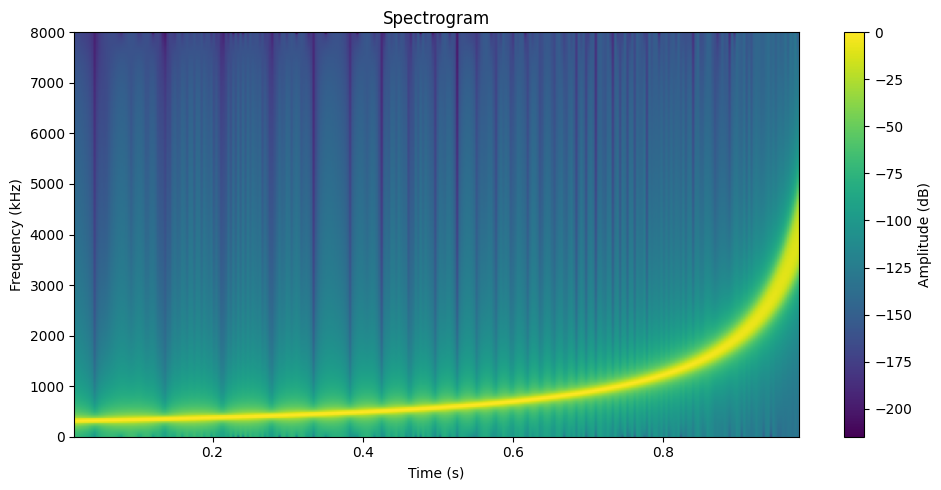

In [4]:
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=512, overlap=90)
plot_spectrogram(Sx, t, f, cmap='grey')

In [5]:
signal_ = read_wav("/Users/lenagies/Desktop/Master/Thesis/geese/data/GT00742_10_Boris_contact.wav")
print(signal_)

Signal(data=array([-0.00012207, -0.00094607, -0.001648  , ..., -0.00701926,
       -0.00747703, -0.00817896], shape=(5771,), dtype=float32), n_channels=None, sr=44100, quantization='float32')


/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/handle.py:126: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read(filepath)


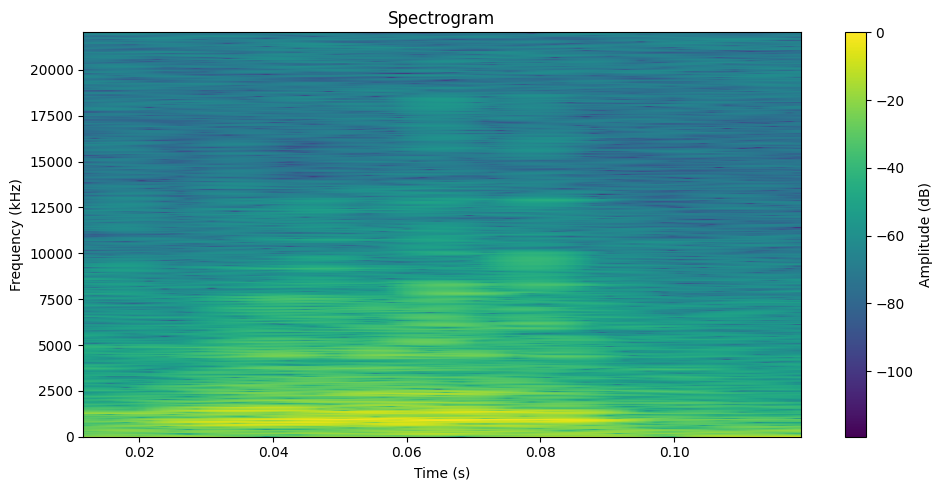

In [6]:
Sx, t, f = spectrogram(signal_.data, sr=signal_.sr, window='hann', window_length=n_fft, overlap=95)
plot_spectrogram(Sx, t, f, cmap='grey')

[3.9635162e+01 5.4068103e+00 5.8359408e-01 ... 3.7286179e-03 5.8359408e-01
 5.4068103e+00]


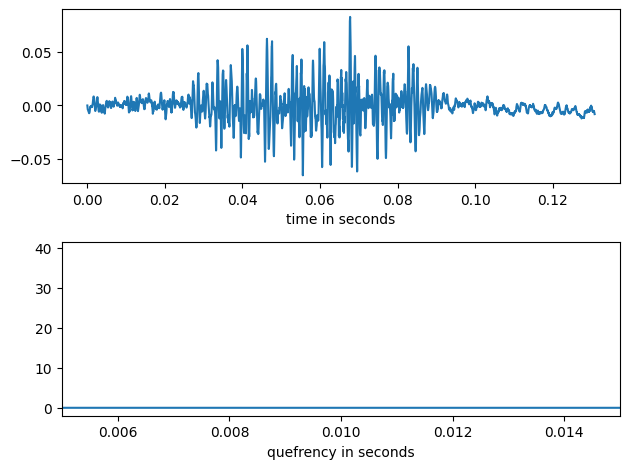

In [7]:
ceps, _ = cepstrum(signal_.data, signal_.sr)
print(ceps)
plot_cepstrum(signal_.data, signal_.sr)

0.0 7479.923826452316


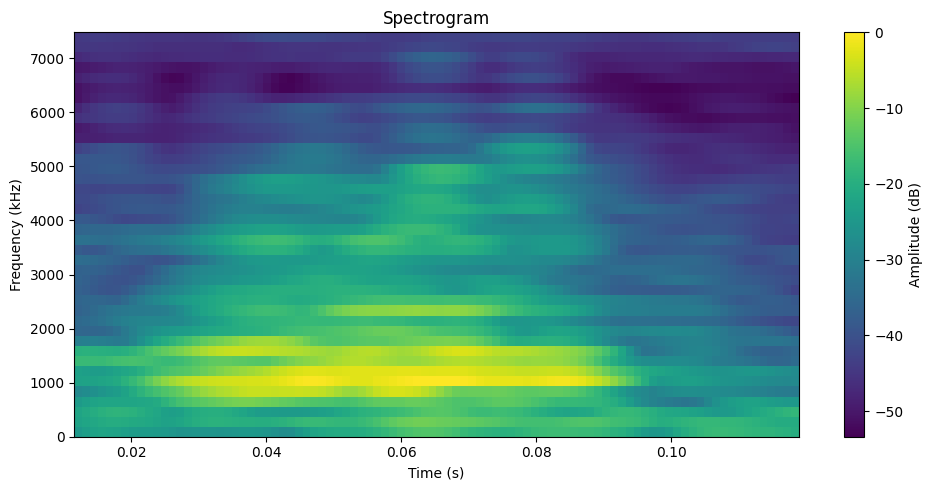

In [8]:
plot_spectrogram(Sx, t, f, cmap='viridis', freq_scale="mel", sr=sr, n_fft=n_fft)

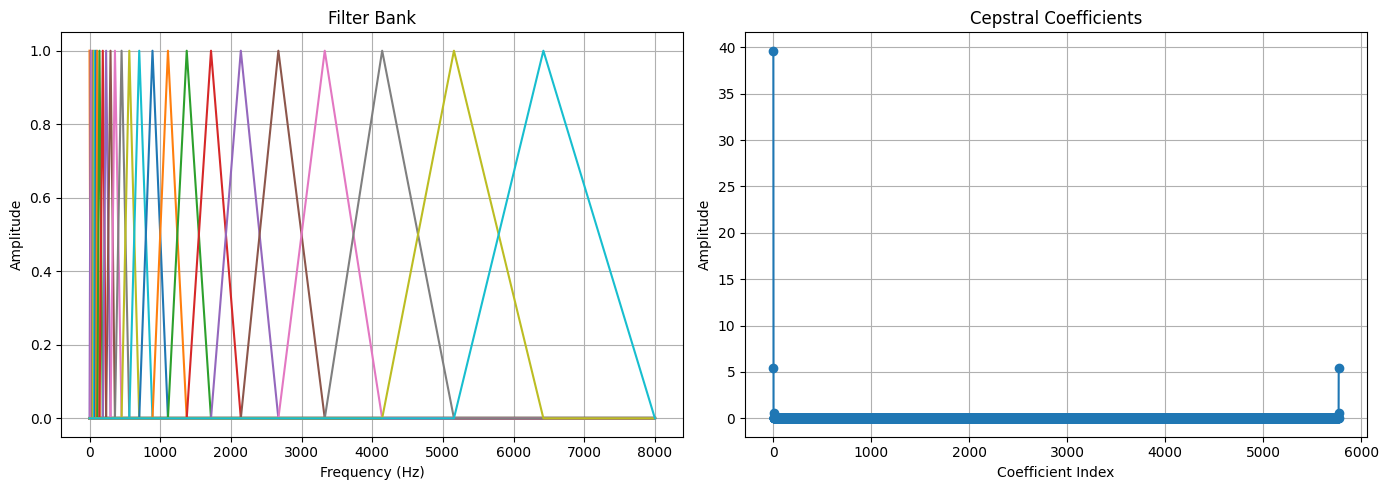

In [9]:
fb, f_centers = log_filterbank(40, n_fft, sr)
plot_filterbank_and_cepstrum(
        fb, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")

1.2450801712916202 6425.289057250802


/Users/lenagies/Desktop/Master/Nebenjob/biosonic/src/biosonic/plot.py:155: RuntimeWarning: divide by zero encountered in log10
  Sx = 20 * np.log10(Sx / ref)


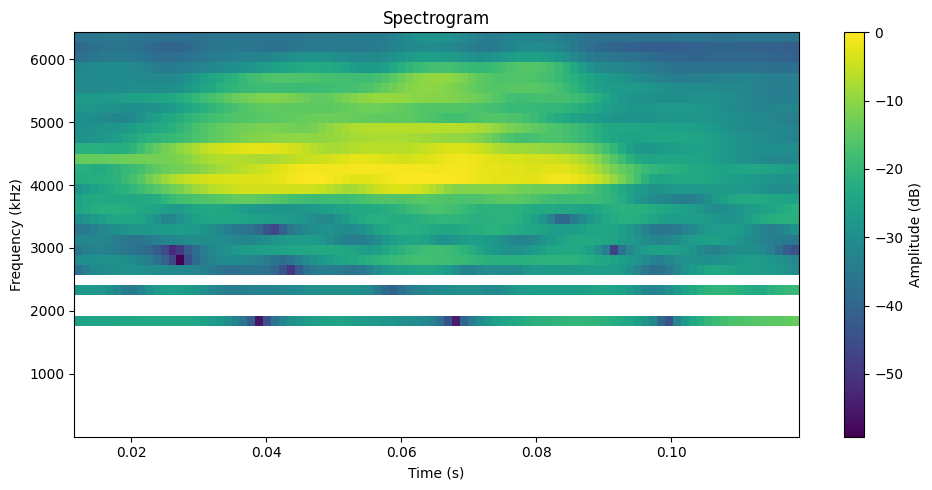

In [10]:
plot_spectrogram(Sx, t, f, cmap='viridis', freq_scale="log", sr=sr, n_fft=n_fft)

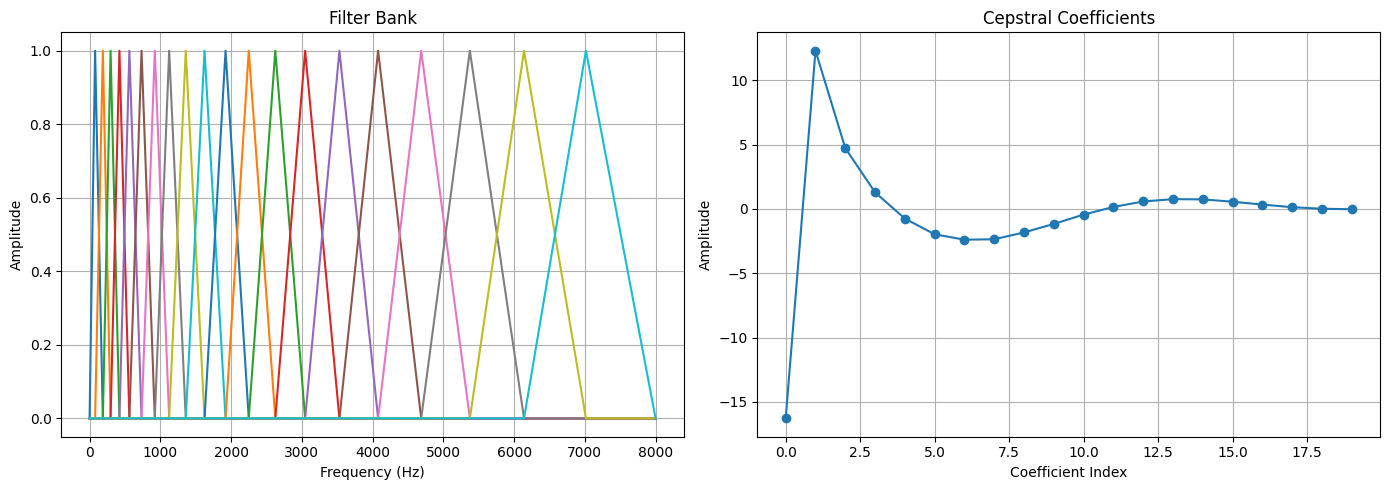

In [11]:
fbanks, _ = mel_filterbank(n_filters, n_fft, sr)
ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")

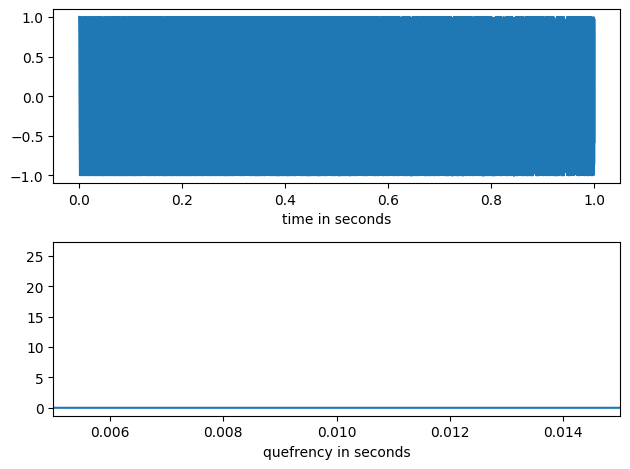

In [12]:
plot_cepstrum(x, sr)

In [13]:
sr = 20
n_fft = 128

T_x, N = 1 / sr, 1000  # 20 Hz sampling rate for 50 s signal
t_x = np.arange(N) * T_x  # time indexes for signal
f_i = 1 * np.arctan((t_x - t_x[N // 2]) / 2) + 5  # varying frequency
x = np.sin(2*np.pi*np.cumsum(f_i)*T_x)

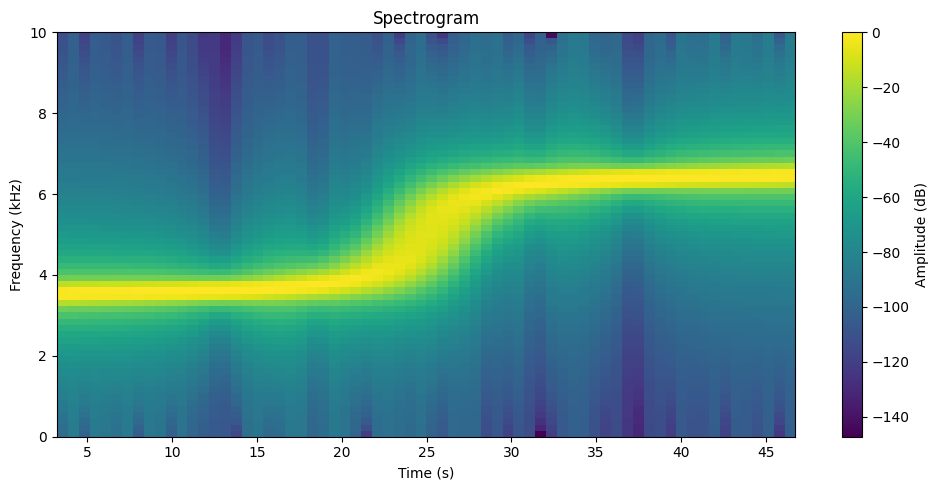

In [14]:
Sx, t, f = spectrogram(x, sr=sr, window='hann', window_length=n_fft, overlap=90)
plot_spectrogram(Sx, t, f, cmap='grey')

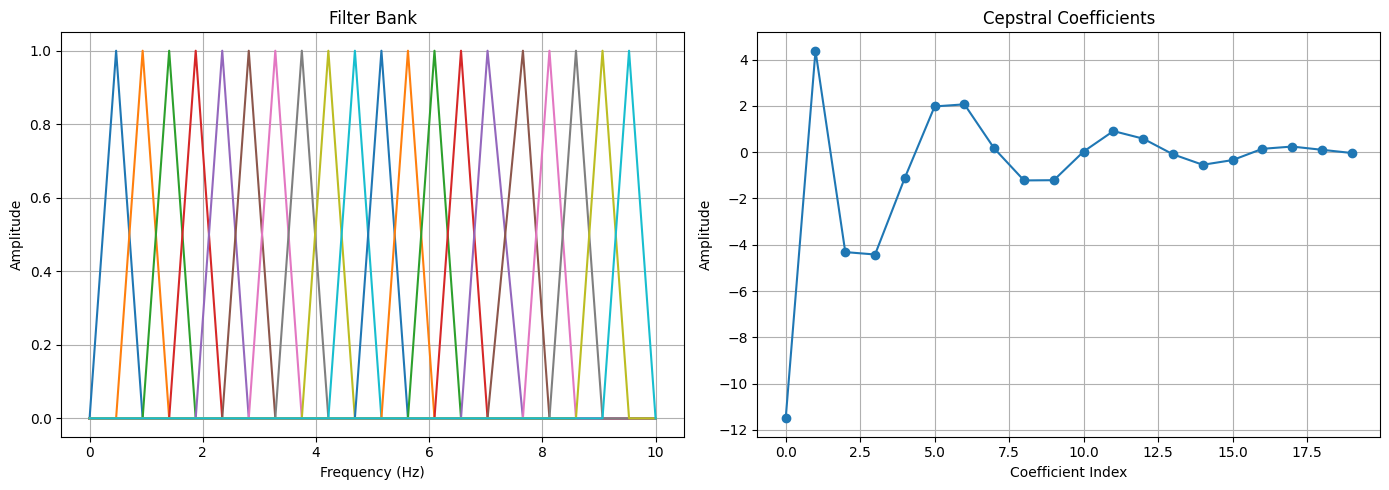

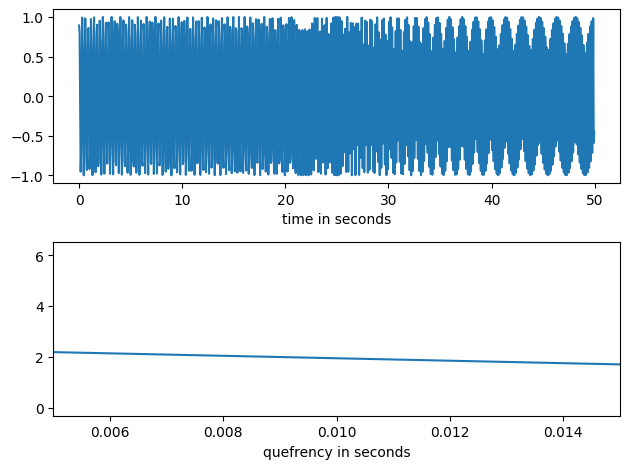

In [15]:
fbanks, _ = mel_filterbank(n_filters, n_fft, sr)
ceps = cepstral_coefficients(x, sr, n_fft, n_filters, n_ceps)
plot_filterbank_and_cepstrum(
        fbanks, 
        sr, 
        n_fft, 
        ceps, 
        fmax=None, 
        title_prefix="")
plot_cepstrum(x, sr)

0.0 9.389437601633858


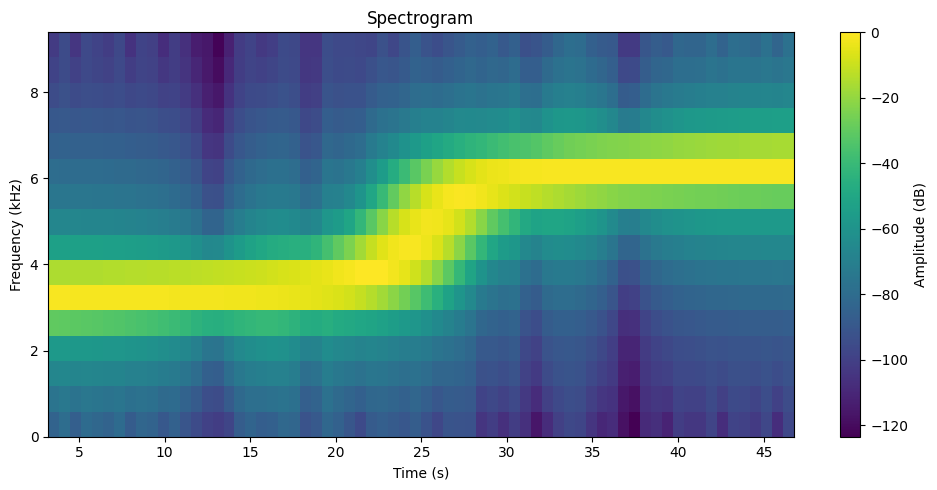

In [16]:
plot_spectrogram(Sx, t, f, cmap='grey', freq_scale="mel", n_fft=n_fft, sr=sr, n_bands=16)

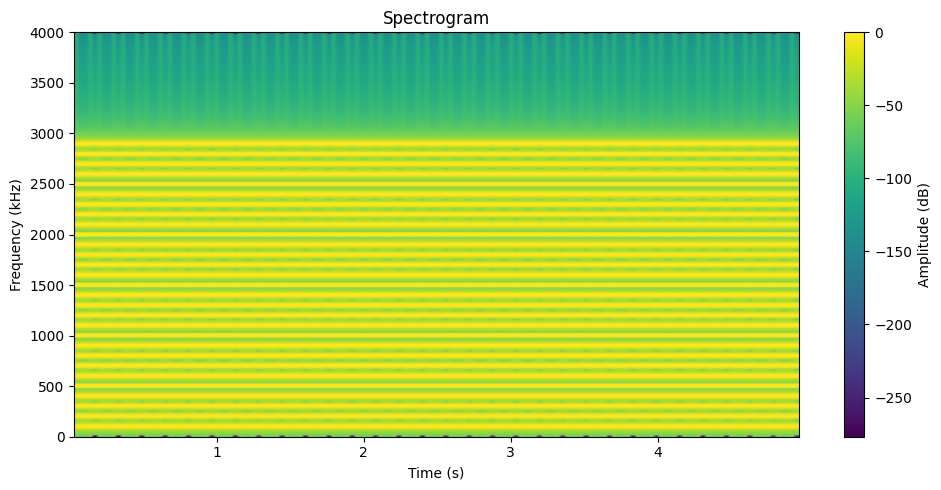

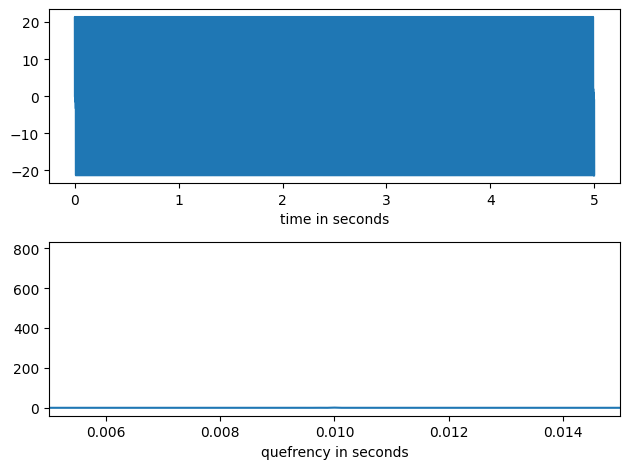

In [17]:
duration = 5.0
sr = 8000.0
samples = int(sr*duration)
t = np.arange(samples) / sr
fundamental = 100.0
harmonics = np.arange(1, 30) * fundamental
data = np.sin(2.0*np.pi*harmonics[:,None]*t).sum(axis=0)

Sx, t, f = spectrogram(data, sr)
plot_spectrogram(Sx, t, f, cmap='grey', n_fft=512, sr=sr)
plot_cepstrum(data, sr)

In [18]:
from biosonic.handle import batch_normalize_wav_files

batch_normalize_wav_files("/Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles", 44100, 1, "float32")

Normalized: GT00001.wav -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT00001.wav
Normalized: GT00704.wav -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT00704.wav
Normalized: GT01056.WAV -> /Users/lenagies/Desktop/Master/Nebenjob/biosonic/testfiles/normalized/GT01056.WAV
